In [31]:
# import the required libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
housing_df = pd.read_csv("data/housing.csv")

In [8]:
housing_df.info() # gets quick description of the data e.g data types and the number of non null values for the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# ocean_proximity is non-numerical, getting the unique values
housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
# Getting the summary of the numerical columns
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


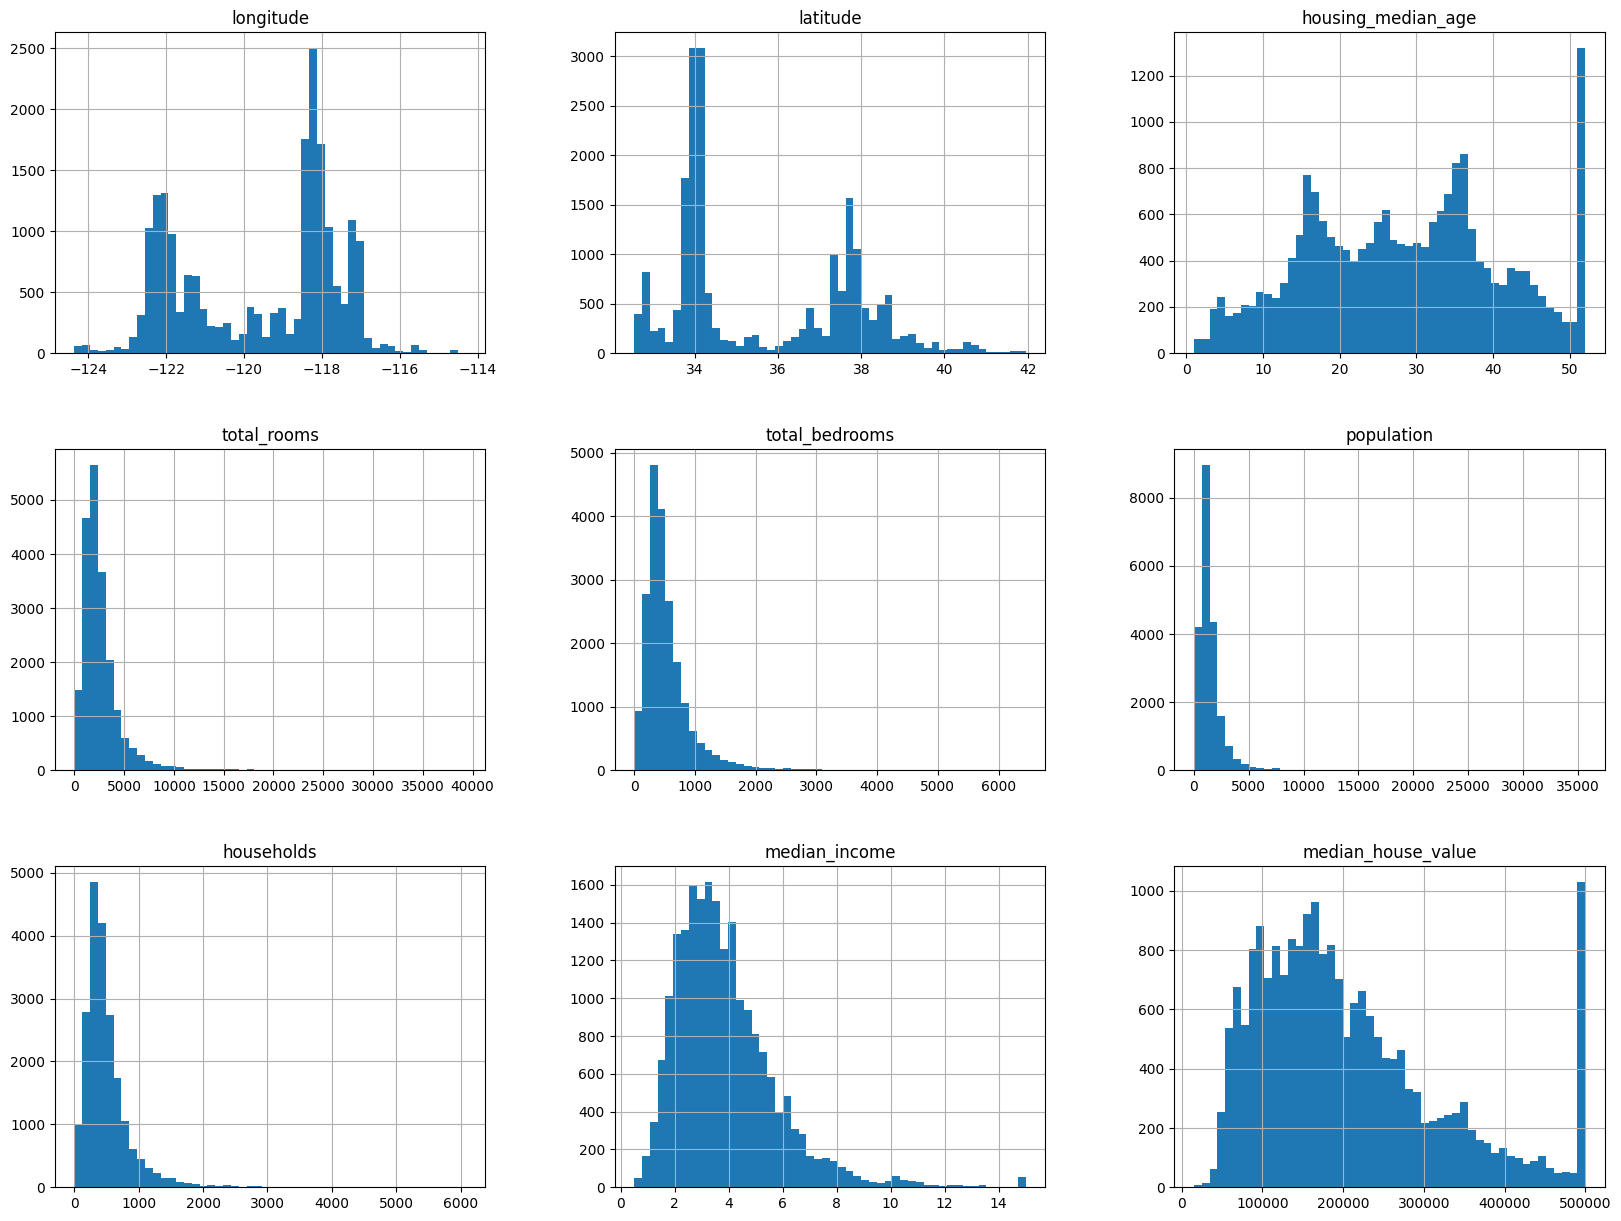

In [16]:
# plotting the histogram for numerical columns
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

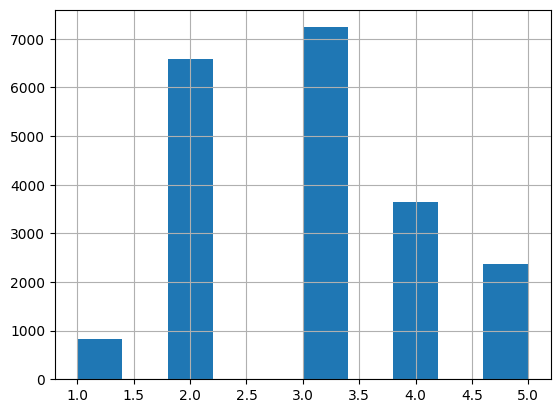

In [37]:
# get categories for the medium income i.e 5 categories to be used in stratified sampling
housing_df["income_cat"] = pd.cut(
    housing_df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing_df["income_cat"].hist()
plt.show()

In [43]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    train_set = housing_df.loc[train_index]
    test_set = housing_df.loc[test_index]

for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [44]:
# make copy of the data for visualization
train_copy = train_set.copy()

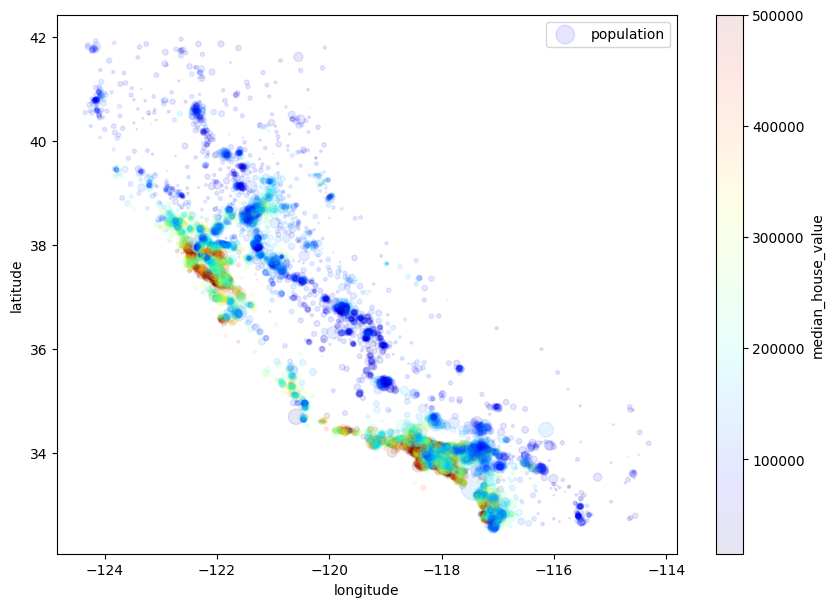

In [54]:
train_copy.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.1, s=train_copy["population"]/100,
    label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True)
plt.legend()
plt.show()